In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import skimage
from skimage import io
import matplotlib as mp
import pylab as pl
import tensorflow as tf
%matplotlib inline
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
digits = mnist.data
target = mnist.target
digits.shape
target.shape
#digits[100]
#pl.imshow(digits[69989].reshape(28,28))
from sklearn import ensemble
classifier=ensemble.RandomForestClassifier()
classifier.fit(digits,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Populating the interactive namespace from numpy and matplotlib
(198, 254)
198 254


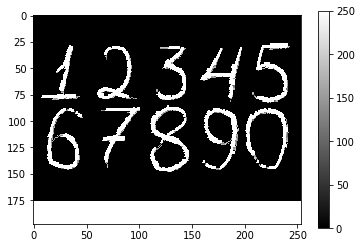

In [2]:
%pylab inline
origimage=io.imread('C:/Users/bnaveen3/Desktop/images.jpg',as_gray='true')
e,f,g=origimage.shape
from skimage.transform import rescale, resize, downscale_local_mean
image=origimage[:,:,0].reshape(e,f)
#print(image.shape)
#image=origimage
#image = rescale(origimage, 1.0 / 1)
#print(image.shape)
#image =image*250
idx = image[:,:]<100
idx_not =image[:,:]>200
image[idx_not]=0
image[idx]=250
print(image.shape)
x,y=image.shape
print(x,y)
for i in range(x-1):
    for j in range(y-1):
        if image[i,j] >200:
            pass
            #darkening the already darkened area so that it will be easy to identify test block
            image[i,j-1] = image[i,j]
            image[i,j-2] = image[i,j]
            image[i-1,j] = image[i,j]
            image[i-1,j-1] = image[i,j]
            image[i-2,j] = image[i,j]
            image[i-2,j-1] = image[i,j]
            image[i-2,j] = image[i,j]


pl.imshow(image,cmap='gray')
pl.colorbar()
  


x 198 y 254


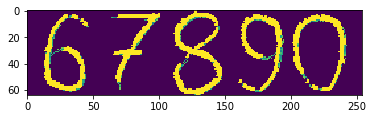

In [9]:
x,y=image.shape
print('x',x,'y',y)
closeflag='N'
c=0
m=0
while(closeflag !='Y'):
    #print('m',m)
    for i in range(m,x-1):
        #print('i',i)
        if i >=x-2:
            closeflag='Y'
        #print('i',i,'x',x)
        #print('sum',sum(image[i]))
        #print('i',i)
        if sum(image[i]) > 0.9*y:
            rows = i
            break
            print('rows',rows)
    for j in range(rows,x-1):
        m=j
        if j >=x-2:
            closeflag='Y'
        if sum(image[j]) < 0.9*y:
            rowe = j
            m=rowe
        
            #print('rows',rows,'rowe',rowe)
            cropimage=image[rows:rowe,]
            break
pl.imshow(cropimage)

x 198 y 254
rows 27 rowe 83
clength 56 cols 8 ccole 45
clength 56 cols 61 ccole 99
clength 56 cols 117 ccole 145
clength 56 cols 158 ccole 198
clength 56 cols 208 ccole 244
clength 56 cols 208 ccole 244
rows 85 rowe 149
clength 64 cols 13 ccole 47
clength 64 cols 64 ccole 101
clength 64 cols 111 ccole 148
clength 64 cols 160 ccole 195
clength 64 cols 201 ccole 243
clength 64 cols 201 ccole 243
final  
 9 7 9 4 7 
 7 6 4 2 5


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1.0

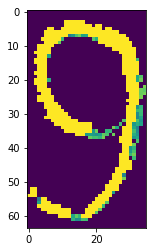

In [11]:
x,y=image.shape
print('x',x,'y',y)
closeflag='N'
c=0
m=0
exitflag='N'
final=''
while(closeflag !='Y'):
    for i in range(m,x-1):
        if i >=x-2:
            closeflag='Y'
        #print('i',i,'x',x)
        #print('sum',sum(image[i]))
        #print('sum',sum(image[i]))
        if sum(image[i]) > 0.9*y:
            rows = i
            break
    #print('rows',rows)
    for j in range(rows,x-1):
        if j >=x-2:
            closeflag='Y'
        if sum(image[j]) < 0.9*y:
            rowe = j
            m=rowe
            print('rows',rows,'rowe',rowe)
            cropimage=image[rows:rowe,]
            final = final + ' \n'
            a,b =cropimage.shape
            clength =rowe-rows
            l=0
            exitflag = 'N'
            while(exitflag != 'Y'):
                #print('a',a)
                for i in range(l,b-1):
                    if i == b-2:
                        exitflag='Y'
                    if sum(cropimage[:,i]) > clength*.85:
                        cols = i
                        #print('cstart',cstart)
                        break
                for i in range(cols+1,b-1):
                    if i == b-2:
                        exitflag='Y'
                    if sum(cropimage[:,i]) < clength*.85:
                        cole = i
                        l=cole
                        #print('cend',cend)
                        l=cole+1
                        #print('cols',cols,'cole',cole)
                        print('clength',clength,'cols',cols,'ccole',cole)
                        curimage=cropimage[0:clength,cols-1:cole+2]
                        curimage = skimage.transform.resize(curimage, (28,28), preserve_range=True)
                        curimage1 = curimage
                        curimage = curimage.reshape(784,1)
                        if exitflag!='Y':
                            final = final+' '+str(int(classifier.predict(curimage.reshape(1,784))[0]))
                        break
            break
print('final',final)
a=cropimage[0:64,201:243]
pl.imshow(cropimage[0:64,160:195])
#sum(image[30])
a.shape
#a[0:63,34]=0
#f=a[1]
#f=0
#a=np.insert(a,0,f,axis=1)
#a=np.insert(a,0,f,axis=1)
#a=np.insert(a,0,f,axis=1)
#a=np.insert(a,0,f,axis=1)
#a=np.insert(a,39,f,axis=1)
#a=np.insert(a,40,f,axis=1)
#a=np.insert(a,41,f,axis=1)
#a=np.insert(a,42,f,axis=1)
#a=np.insert(a,43,f,axis=1)

a = skimage.transform.resize(a, (28,28), preserve_range=True)
#pl.imshow(image,cmap='gray')
a=a.reshape(784,1)
classifier.predict(a.reshape(1,784))[0]